/home/jrmet/miniconda3/envs/pytmd/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 0f437949513225922d851e9581723d82120684a6
python           : 3.11.4.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.15.0-78-generic
Version          : #85~20.04.1-Ubuntu SMP Mon Jul 17 09:42:39 UTC 2023
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 2.0.3
numpy            : 1.25.2
pytz             : 2023.3
dateutil         : 2.8.2
setuptools       : 68.0.0
pip              : 23.2.1
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.3
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.2
IPython          : 8.14.0
pandas_datareader: None
bs4              : 4.12.2
bottleneck       : None
bro

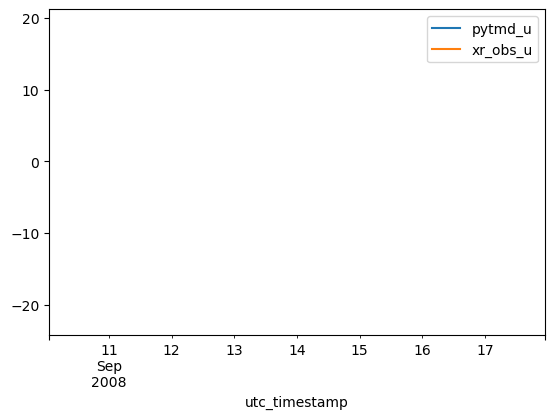

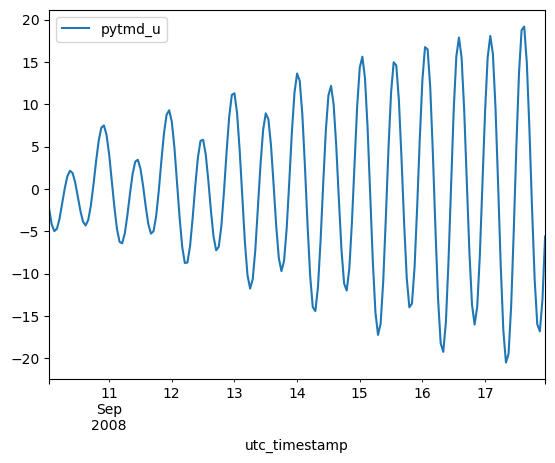

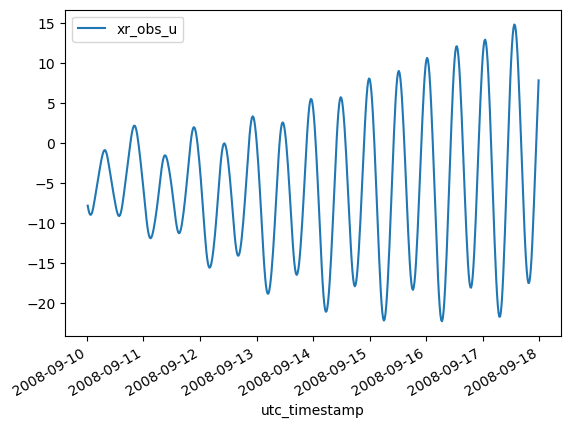

In [1]:
import pickle as pkl
import pandas as pd
import datetime
import matplotlib.pyplot as plt

pd.show_versions()

with open("./df_pytmd_currents.pkl", "br") as fh:
    df_pytmd = pkl.load(fh)

with open("./df_xr_obs_currents.pkl", "br") as fh:
    df_xr_obs = pkl.load(fh)

# time window to plot for comparison
utc_timestamp_start = datetime.datetime(2008, 9, 10, 0, 0, 0, tzinfo=datetime.timezone.utc)
utc_timestamp_stop = datetime.datetime(2008, 9, 18, 0, 0, 0, tzinfo=datetime.timezone.utc)

def get_mask(df_in, utc_timestamp_start, utc_timestamp_stop):
    mask = (df_in["utc_timestamp"] > utc_timestamp_start) & (df_in["utc_timestamp"] < utc_timestamp_stop) 
    return mask

# plotting...

# keeping this for now, to report issue to pandas

# this should work but plot is empty!
fig = plt.figure()
ax = plt.gca()
#
mask_pytmd = get_mask(df_pytmd, utc_timestamp_start, utc_timestamp_stop)
df_pytmd.loc[mask_pytmd].plot(x="utc_timestamp", y="pytmd_u", ax=ax)
#
mask_xr_obs = get_mask(df_xr_obs, utc_timestamp_start, utc_timestamp_stop)
df_xr_obs.loc[mask_xr_obs].plot(x="utc_timestamp", y=["xr_obs_u"], ax=ax)
#
plt.show()

# while both plots individually work

# plot 1
fig = plt.figure()
ax = plt.gca()
#
mask_pytmd = get_mask(df_pytmd, utc_timestamp_start, utc_timestamp_stop)
df_pytmd.loc[mask_pytmd].plot(x="utc_timestamp", y="pytmd_u", ax=ax)
#
# mask_xr_obs = get_mask(df_xr_obs, utc_timestamp_start, utc_timestamp_stop)
# df_xr_obs.loc[mask_xr_obs].plot(x="utc_timestamp", y=["xr_obs_u"], ax=ax)
#
plt.show()

# plot 2
fig = plt.figure()
ax = plt.gca()
#
# mask_pytmd = get_mask(df_pytmd, utc_timestamp_start, utc_timestamp_stop)
# df_pytmd.loc[mask_pytmd].plot(x="utc_timestamp", y="pytmd_u", ax=ax)
#
mask_xr_obs = get_mask(df_xr_obs, utc_timestamp_start, utc_timestamp_stop)
df_xr_obs.loc[mask_xr_obs].plot(x="utc_timestamp", y=["xr_obs_u"], ax=ax)
#
plt.show()